In [1]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [2]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [3]:
exp_data=mmread('data/koh_extract/koh.data.counts.mm').toarray().astype(float)
with open('data/koh_extract/koh.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/koh_extract/koh.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [4]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [5]:
exp_data,exp_data.shape

(array([[1.93134327e+04, 5.81785206e+04, 9.08678570e+03, ...,
         7.58501657e+04, 8.94289538e+04, 1.01937411e+05],
        [2.48547207e+04, 4.67361235e+04, 1.09620933e+04, ...,
         1.85699498e+04, 1.85806217e+04, 2.49668288e+04],
        [1.18570138e+04, 2.80836990e+04, 6.80287185e+03, ...,
         3.53701816e+04, 5.75775170e+04, 5.59807979e+04],
        ...,
        [4.83851544e+01, 1.19916350e+01, 6.96361343e+00, ...,
         4.88990717e+00, 8.49751588e+00, 7.80405857e+01],
        [2.35818377e+01, 4.26839000e+01, 1.80639917e+01, ...,
         7.54470439e+00, 2.84437127e+00, 8.88332407e+00],
        [6.10992450e+01, 2.59814157e+01, 2.45930809e+01, ...,
         4.85579286e-01, 0.00000000e+00, 0.00000000e+00]]), (4898, 446))

In [6]:
exp_data_row[:5],exp_data_col[:5]

(['ENSG00000198804',
  'ENSG00000210082',
  'ENSG00000198712',
  'ENSG00000198938',
  'ENSG00000198727'],
 ['SRR3952323', 'SRR3952325', 'SRR3952326', 'SRR3952327', 'SRR3952328'])

## cluster info 

In [7]:
exp_data_meta=pd.read_csv('data/koh_extract/koh.metadata.tsv',sep='\t')
exp_data_meta.head()

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype,tSNE_1,tSNE_2
SRR3952323,SRR3952323,H7hESC,H7hESC,False,False,4895,3.689841,2.248411e+06,6.351876,18.278965,25.975390,35.537616,52.410941,False,hESC,9.973465,19.045918
SRR3952325,SRR3952325,H7hESC,H7hESC,False,False,4887,3.689131,2.271617e+06,6.356335,24.672529,32.222803,41.547358,57.969233,False,hESC,10.366232,21.511833
SRR3952326,SRR3952326,H7hESC,H7hESC,False,False,4888,3.689220,5.846824e+05,5.766921,22.732839,30.205988,39.431308,55.285817,False,hESC,9.881356,19.317197
SRR3952327,SRR3952327,H7hESC,H7hESC,False,False,4879,3.688420,3.191810e+06,6.504037,20.867378,29.003904,38.785558,56.020859,False,hESC,8.483966,21.289459
SRR3952328,SRR3952328,H7hESC,H7hESC,False,False,4873,3.687886,2.190385e+06,6.340521,21.287923,29.423689,39.307683,56.640975,False,hESC,9.017168,20.637262


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

# Panglao

In [8]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


In [9]:
#markers_db[(markers_db['official gene symbol']=='FXDY2') |(markers_db['nicknames'].str.contains('FXDY2'))],'FXDY2' in exp_data_row

## Marker info

In [10]:
clustername_to_markers=pd.read_csv('data/koh_extract/koh.rho.tsv',sep='\t').T

In [11]:
clustername_to_markers

,ENSG00000008311,ENSG00000018625,ENSG00000019549,ENSG00000026025,ENSG00000039068,ENSG00000042493,ENSG00000053438,ENSG00000075340,ENSG00000079102,ENSG00000092068,...,ENSG00000240563,ENSG00000241186,ENSG00000243004,ENSG00000249532,ENSG00000250305,ENSG00000254277,ENSG00000254339,ENSG00000260342,ENSG00000260834,ENSG00000280623
hESC,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,0
APS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
MPS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DLL1pPXM,0,1,1,1,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
ESMT,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,1,0
Sclrtm,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
D5CntrlDrmmtm,0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,1,1,0
D2LtM,0,1,1,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,1,1,0


In [12]:
len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index.intersection(
    clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0]==1].index
)),len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index)

(27, 50)

In [13]:
clustername_unique=list(clustername_to_markers.index)
exp_data_meta_clusterid_clusteridunique=exp_data_meta['celltype'].apply(lambda x: clustername_unique.index(x))

In [14]:
marker_unique=list(clustername_to_markers.columns)
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]

In [15]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [16]:
cell_size_factor=pd.read_csv('data/analysis/koh.size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
#cell_size_factor=np.ones_like(cell_size_factor)
cell_size_factor.shape

(446,)

In [17]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(446, 84)

In [18]:
#marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers.items()])
#marker_onehot.shape
#marker_onehot.T
marker_onehot=clustername_to_markers

In [19]:
#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null.shape

(446, 1)

In [20]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
#X=x_data_null.copy()[:,[0, 1,2,3,4]]
#X=x_data_null.copy()[:,[0, 1,2]]
#X=x_data_null.copy()[:,[0,1,2,3]]
X=x_data_null.copy()#[:,[0,1,2]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(446, 1)

In [21]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [22]:
torch.set_default_dtype(torch.float64) 

In [23]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [24]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [25]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [26]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [27]:
def run_EM(model,optimizer,LL_diff_tolerance,Q_diff_tolerance):
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Poisson
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                return gamma,None,LL
        else:
            raise          

# 0. Answer

 ![Alt text](data/koh_extract/koh.png "Optional title").

# 1. Normal case

In [29]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(446, 84)

In [30]:
device=device_cuda_list[3]#

model=Custom_Model(Y,rho.values,X_col=X.shape[1],delta_min=2,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [31]:
rho.shape

(8, 84)

In [32]:
run_EM(model,optimizer,LL_diff_tolerance=1e-1*LL_diff_tolerance,Q_diff_tolerance=1e-1*Q_diff_tolerance)

Start time: 2020-05-26 13:49:27
tensor(-23352509.3002, device='cuda:2')
tensor(23352509.3078, device='cuda:2')
M: 0, Q: 23352509.307789583 Q_diff: 0.0
M: 20, Q: 7248415.7521271575 Q_diff: 0.6896086987230388
M: 40, Q: 6444583.627195826 Q_diff: 0.11089762955380077
M: 60, Q: 5936534.011335768 Q_diff: 0.07883358262527831
M: 80, Q: 5631972.794541442 Q_diff: 0.05130286733180819
M: 100, Q: 5462436.825798051 Q_diff: 0.030102412587593847
M: 120, Q: 5358002.190423019 Q_diff: 0.019118689827552285
M: 140, Q: 5286416.619765199 Q_diff: 0.01336049671382622
M: 160, Q: 5233933.435289662 Q_diff: 0.00992793195286745
M: 180, Q: 5194028.747750644 Q_diff: 0.007624225266214193
M: 200, Q: 5163874.933808841 Q_diff: 0.005805476905544933
M: 220, Q: 5141047.635352608 Q_diff: 0.004420575391316793
M: 240, Q: 5122125.47792004 Q_diff: 0.0036806034051210363
M: 260, Q: 5105970.8151155785 Q_diff: 0.0031538982936085876
M: 280, Q: 5092464.043496344 Q_diff: 0.00264528962430595
M: 300, Q: 5081067.094287967 Q_diff: 0.0022380

(tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.]], device='cuda:2'),
 tensor(3429297.6283, device='cuda:2', grad_fn=<NegBackward>),
 tensor(-3429296.4887, device='cuda:2'))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


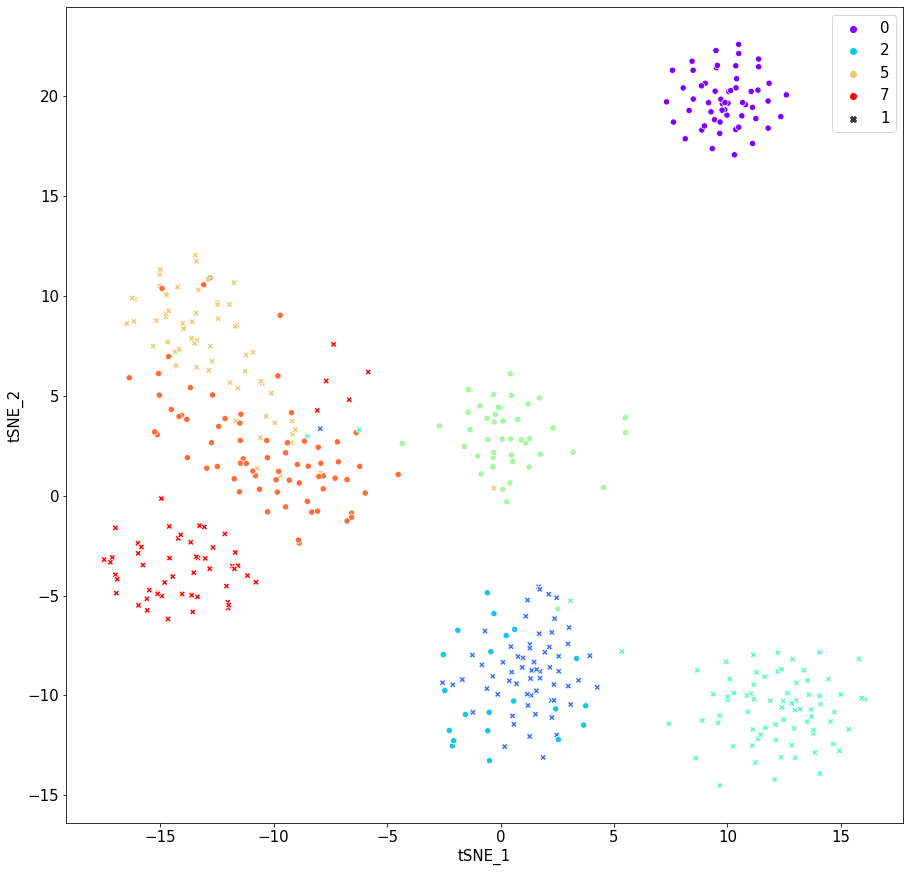

In [33]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

In [34]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

437

In [35]:
np.unique(np.argmax(gamma_new.cpu().numpy(),axis=1),return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([55, 65, 21, 76, 43, 61, 70, 55]))

In [36]:
import statsmodels.api as sm
import sys

label=np.argmax(gamma_new.cpu().numpy(),axis=1)
label=list(map(lambda x: np.unique(label,return_counts=True)[0].tolist().index(x),label))

#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null_test=np.concatenate([x_data_intercept,np.eye(max(label)+1)[label]],axis=1)
x_data_null_test=x_data_null_test[:,:-1]

family=sm.families.Poisson(link=sm.families.links.log())

data_list=[]
data_list_=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    if exp_data_row_idx%100==0:
        sys.stdout.write('\r{}'.format(exp_data_row_idx))
    y_data=exp_data[exp_data_row_idx,:]
    
    model=sm.GLM(y_data,x_data_null_test,family=family)
    model_result=model.fit()
    
    model_=sm.GLM(y_data,x_data_null,family=family)
    model_result_=model_.fit()
    
    data_list.append({
        'llf':model_result.llf,
        'deviance':model_result.deviance,
        'pearson_chi2':model_result.pearson_chi2,
        'llnull':model_result.llnull,
        'null_deviance':model_result.null_deviance
    })
    
    data_list_.append({
        'llf':model_result_.llf,
        'deviance':model_result_.deviance,
        'pearson_chi2':model_result_.pearson_chi2,
        'llnull':model_result_.llnull,
        'null_deviance':model_result_.null_deviance
    })    
    
    #ll_list.append([model_result.llf,model_result.deviance,model_result.pearson_chi2])
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

4800

In [37]:
data_full=pd.DataFrame(data_list)
data_null=pd.DataFrame(data_list_)

In [38]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

437

In [39]:
marker_unique_exp_data_idx=list(map(lambda x: exp_data_row.index(x), rho.columns))
marker_unique_exp_data_idx_bool=np.array(list(map(lambda x: x in marker_unique_exp_data_idx, np.arange(exp_data.shape[0]))))

## deviance of null model

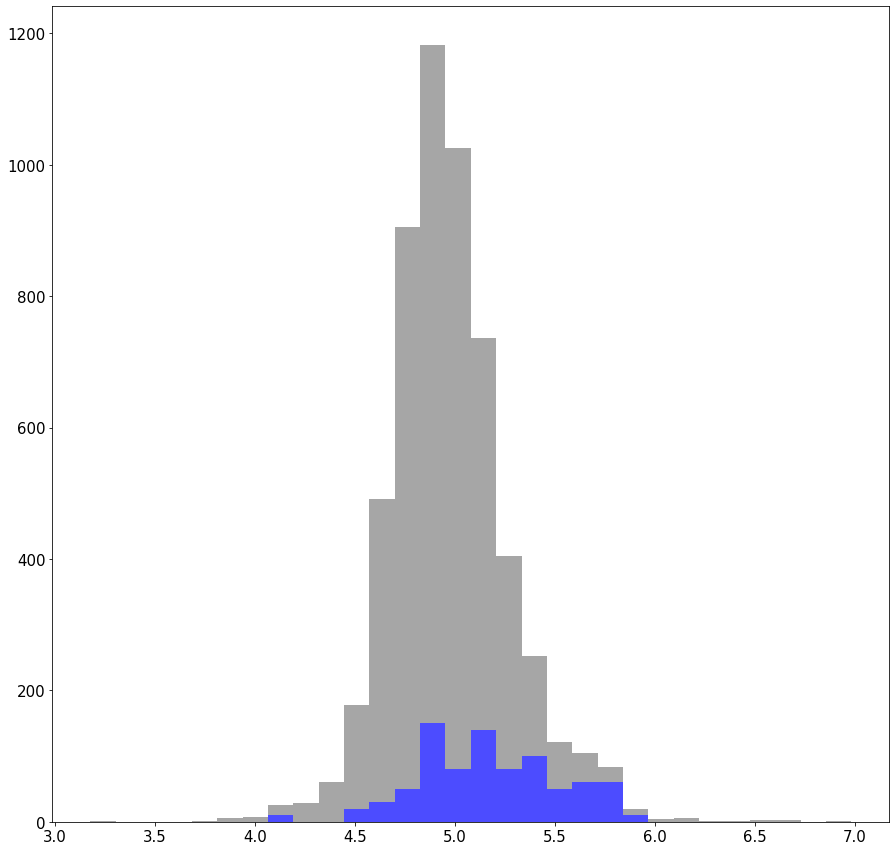

"\ndata_full['null_deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)\ndata_full['null_deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)\n\ndata_full['deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)\ndata_full['deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)\n"

In [40]:
plt.hist(
    x=[
        np.log10(data_full['null_deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['null_deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30,
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7
)
plt.show()

"""
data_full['null_deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)
data_full['null_deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)

data_full['deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)
data_full['deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)
"""

## deviance of full model

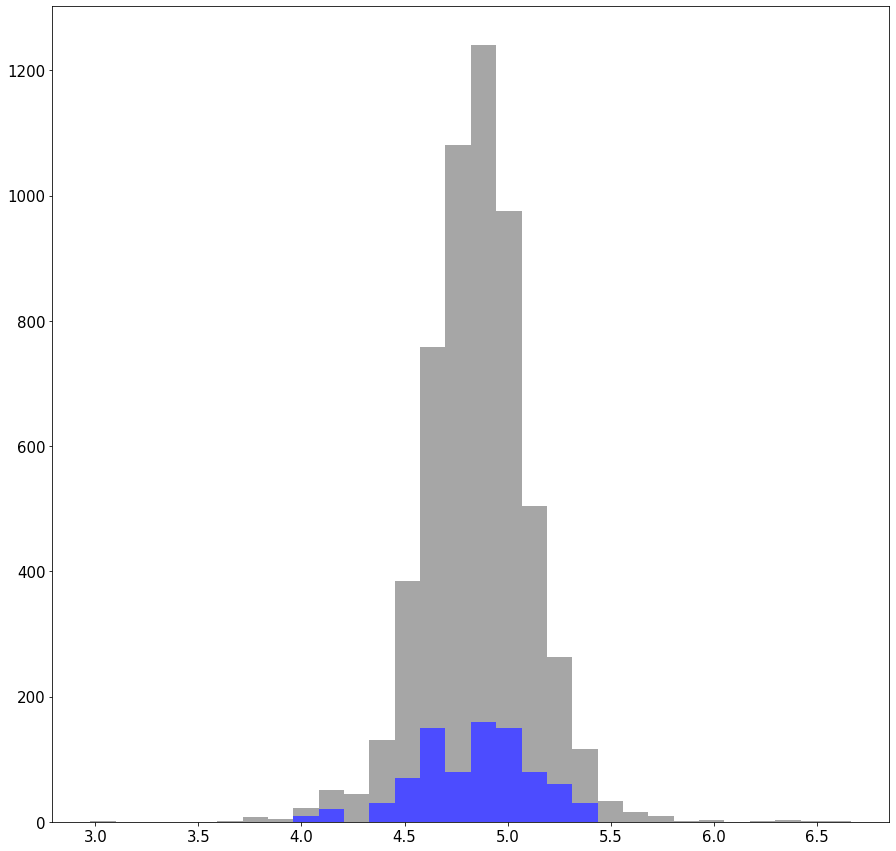

In [41]:
plt.hist(
    x=[
        np.log10(data_full['deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30, 
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7    
    
)

plt.show()

# 2. Case of lost types and markers

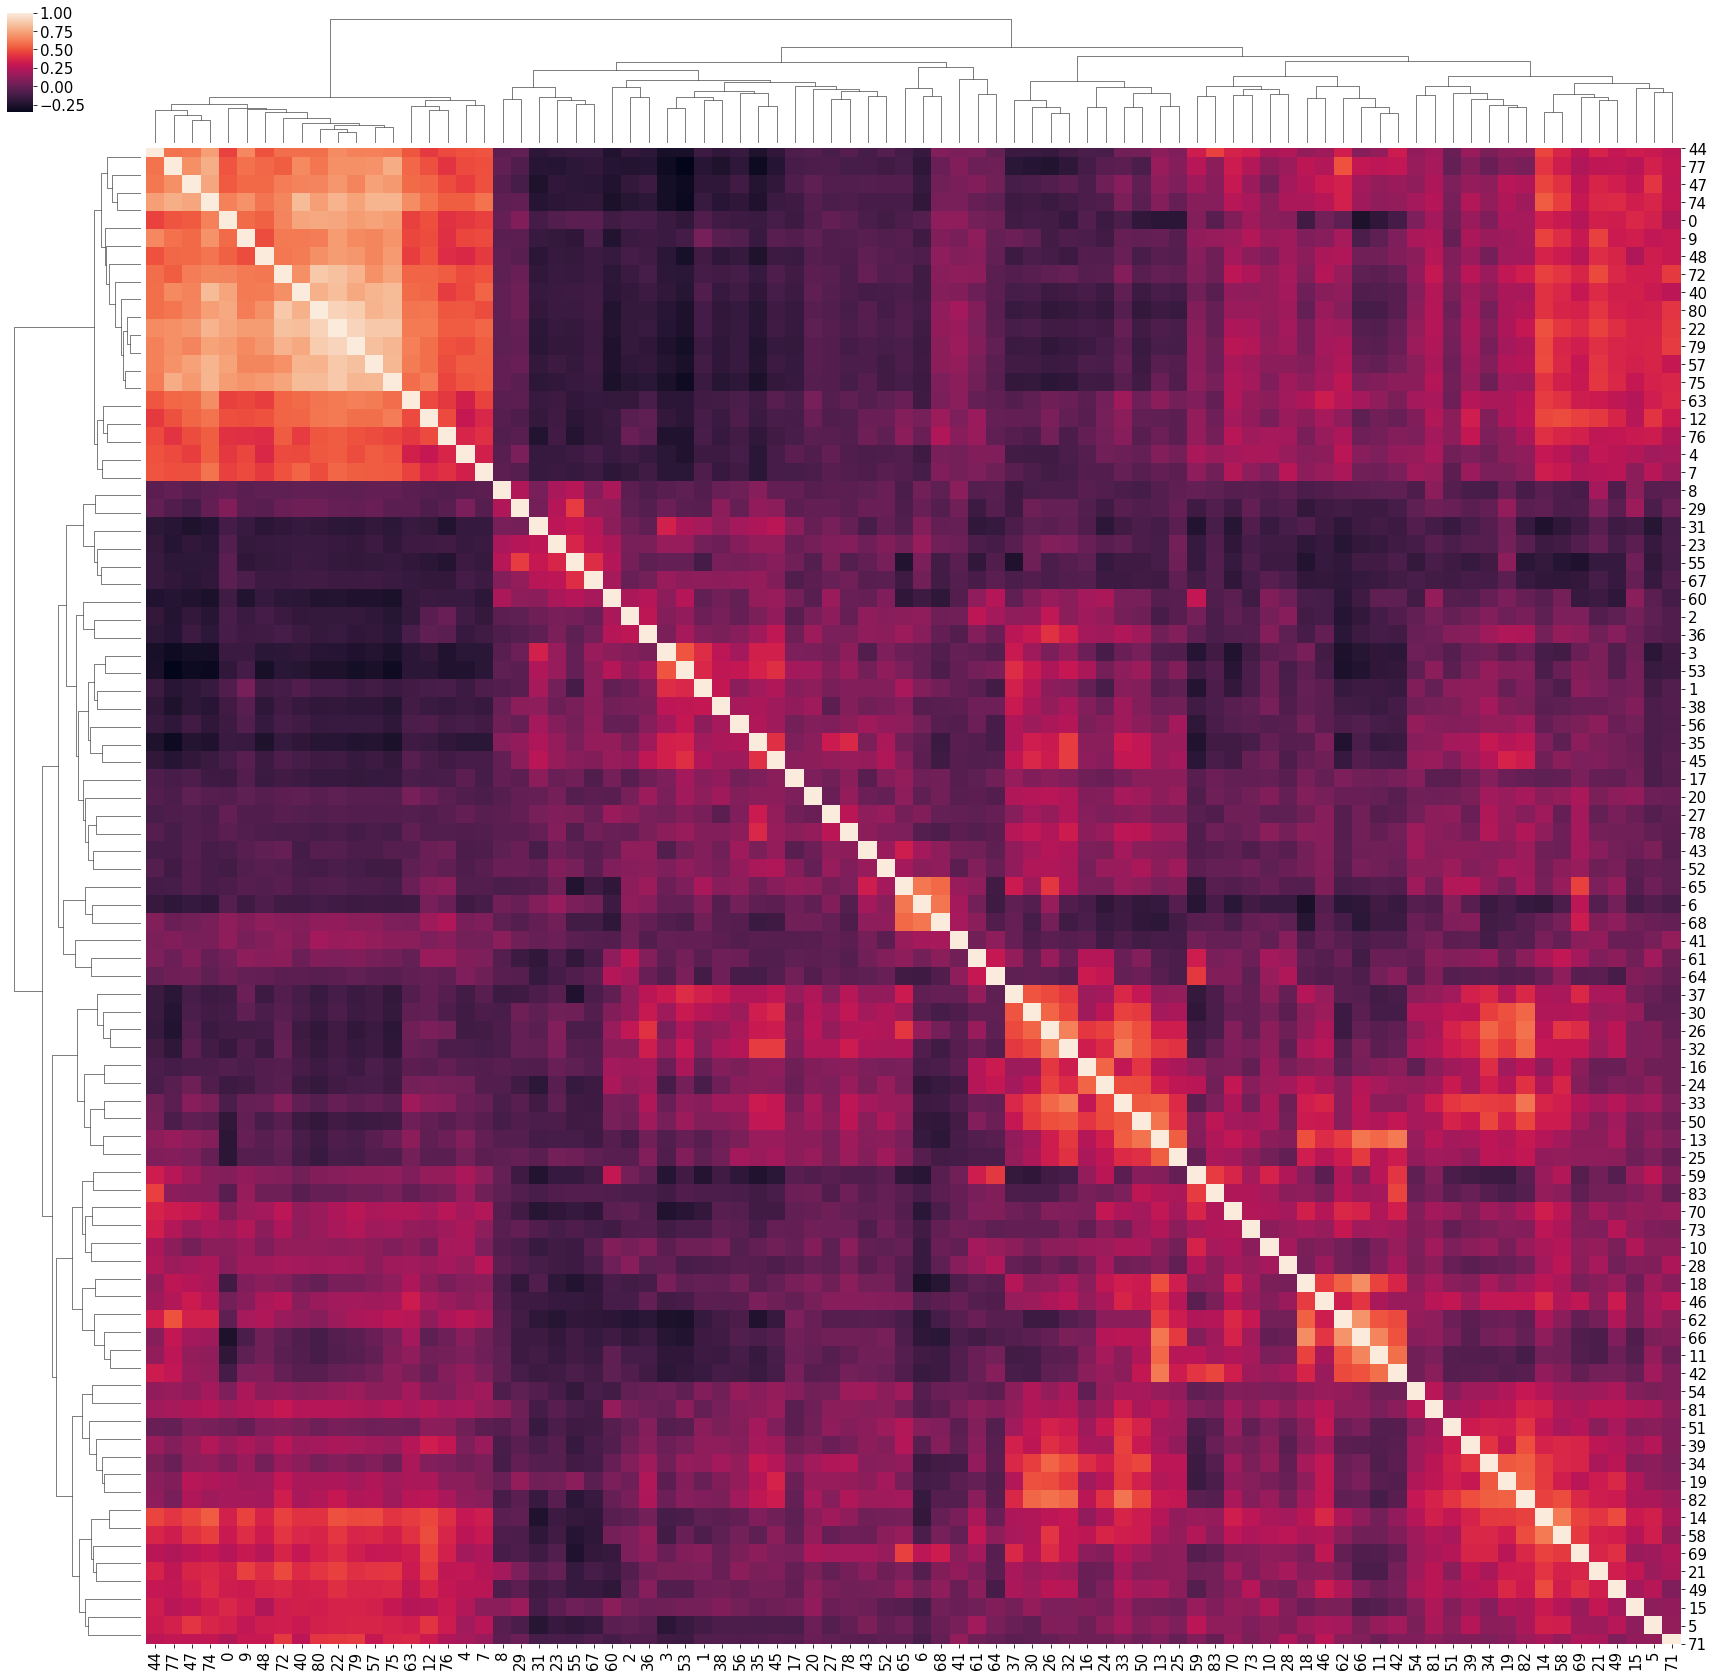

In [42]:
plt.rcParams["figure.figsize"] = (30,30)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'

sns.clustermap(pd.DataFrame(exp_data[marker_unique_exp_data_idx].transpose().astype(float)).corr(),figsize=(30, 30))

In [43]:
rho.T.corr()

,hESC,APS,MPS,DLL1pPXM,ESMT,Sclrtm,D5CntrlDrmmtm,D2LtM
hESC,1.000000,0.376325,0.315063,-0.078163,0.028913,-0.559431,-0.126025,0.197789
APS,0.376325,1.000000,0.922794,0.331635,0.157895,-0.144620,0.217647,0.364308
MPS,0.315063,0.922794,1.000000,0.331635,0.157895,-0.144620,0.217647,0.364308
DLL1pPXM,-0.078163,0.331635,0.331635,1.000000,0.478649,0.104945,0.501720,0.582240
ESMT,0.028913,0.157895,0.157895,0.478649,1.000000,0.279946,0.676520,0.593856
Sclrtm,-0.559431,-0.144620,-0.144620,0.104945,0.279946,1.000000,0.462785,0.196419
D5CntrlDrmmtm,-0.126025,0.217647,0.217647,0.501720,0.676520,0.462785,1.000000,0.552215
D2LtM,0.197789,0.364308,0.364308,0.582240,0.593856,0.196419,0.552215,1.000000


In [44]:
#rho.columns[(rho.loc[['hESC','APS','MPS','D2LtM']].sum(axis=0)>0)]

In [45]:
#rho_drop=rho.drop(index=['hESC','APS','MPS','D2LtM'])


#rho_drop=rho.drop(index=['hESC'])
#rho_drop=rho.drop(index=['ESMT','D5CntrlDrmmtm','DLL1pPXM','D2LtM'])
#rho_drop.apply(lambda x : np.all(x==1) | np.all(x==0) ,axis=0)

In [46]:
rho

,ENSG00000008311,ENSG00000018625,ENSG00000019549,ENSG00000026025,ENSG00000039068,ENSG00000042493,ENSG00000053438,ENSG00000075340,ENSG00000079102,ENSG00000092068,...,ENSG00000240563,ENSG00000241186,ENSG00000243004,ENSG00000249532,ENSG00000250305,ENSG00000254277,ENSG00000254339,ENSG00000260342,ENSG00000260834,ENSG00000280623
hESC,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,0
APS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
MPS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DLL1pPXM,0,1,1,1,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
ESMT,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,1,0
Sclrtm,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
D5CntrlDrmmtm,0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,1,1,0
D2LtM,0,1,1,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,1,1,0


In [47]:
rho_drop=rho.drop(index=['hESC','APS'],columns=rho.columns[(rho.loc[['hESC','APS']].sum(axis=0)>0)])

In [48]:
rho_drop

,ENSG00000026025,ENSG00000053438,ENSG00000132669,ENSG00000137831,ENSG00000137868,ENSG00000138061,ENSG00000141449,ENSG00000147010,ENSG00000169122,ENSG00000181744,ENSG00000185920,ENSG00000197461,ENSG00000280623
MPS,0,0,0,0,0,0,0,0,0,0,0,0,1
DLL1pPXM,1,0,1,0,1,0,1,1,0,0,1,0,0
ESMT,1,1,1,0,0,1,1,0,0,0,1,1,0
Sclrtm,1,0,1,1,0,1,1,0,1,0,1,0,0
D5CntrlDrmmtm,1,0,1,0,0,1,1,0,0,0,1,0,0
D2LtM,1,0,1,0,0,0,1,0,0,1,1,0,0


In [49]:
rho_drop.shape

(6, 13)

In [50]:
rho_drop=rho_drop.iloc[:,~rho_drop.apply(lambda x : np.all(x==1) | np.all(x==0) ,axis=0).values]
rho_drop

,ENSG00000026025,ENSG00000053438,ENSG00000132669,ENSG00000137831,ENSG00000137868,ENSG00000138061,ENSG00000141449,ENSG00000147010,ENSG00000169122,ENSG00000181744,ENSG00000185920,ENSG00000197461,ENSG00000280623
MPS,0,0,0,0,0,0,0,0,0,0,0,0,1
DLL1pPXM,1,0,1,0,1,0,1,1,0,0,1,0,0
ESMT,1,1,1,0,0,1,1,0,0,0,1,1,0
Sclrtm,1,0,1,1,0,1,1,0,1,0,1,0,0
D5CntrlDrmmtm,1,0,1,0,0,1,1,0,0,0,1,0,0
D2LtM,1,0,1,0,0,0,1,0,0,1,1,0,0


In [51]:
rho_drop.shape

(6, 13)

In [52]:
Y=exp_data[list(map(lambda x: exp_data_row.index(x),rho_drop.columns))].transpose().astype(float)
Y.shape

(446, 13)

In [53]:
device=device_cuda_list[3]#

model=Custom_Model(Y,rho_drop.values,X_col=X.shape[1],delta_min=2,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [54]:
run_EM(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance)

Start time: 2020-05-26 13:50:18
tensor(-4327824.3003, device='cuda:2')
tensor(4327825.2518, device='cuda:2')
M: 0, Q: 4327825.251813954 Q_diff: 0.0
M: 20, Q: 1761433.0336995223 Q_diff: 0.5929981154019008
M: 40, Q: 1557512.0557904062 Q_diff: 0.11576992937439276
M: 60, Q: 1419645.691007573 Q_diff: 0.08851704503363786
M: 80, Q: 1331180.0210401528 Q_diff: 0.062315316087518245
M: 100, Q: 1273116.2503717097 Q_diff: 0.04361827082040594
M: 120, Q: 1236665.4545772416 Q_diff: 0.028631160574555278
M: 140, Q: 1214525.9470701006 Q_diff: 0.017902584264156914
M: 160, Q: 1200875.4384086384 Q_diff: 0.011239371784845319
M: 180, Q: 1192442.5840584864 Q_diff: 0.0070222556648563885
M: 200, Q: 1186655.4261856284 Q_diff: 0.004853196246280773
M: 220, Q: 1183628.583456587 Q_diff: 0.0025507343262827368
M: 240, Q: 1181624.7936043176 Q_diff: 0.0016929211412060785
M: 260, Q: 1180023.7104505715 Q_diff: 0.0013549843930257225
M: 280, Q: 1178715.8457049248 Q_diff: 0.001108337683441403
M: 300, Q: 1177635.2752398266 Q_d

(tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00],
         [ 0.0000e+00, 1.5773e-218,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00],
         ...,
         [ 0.0000e+00, 1.9192e-163,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           1.0000e+00]], device='cuda:2'),
 tensor(709702.2426, device='cuda:2', grad_fn=<NegBackward>),
 tensor(-709700.2783, device='cuda:2'))

(array([0, 1, 2, 3, 4, 5]), array([ 23, 123,  42,  64,  42, 152]))

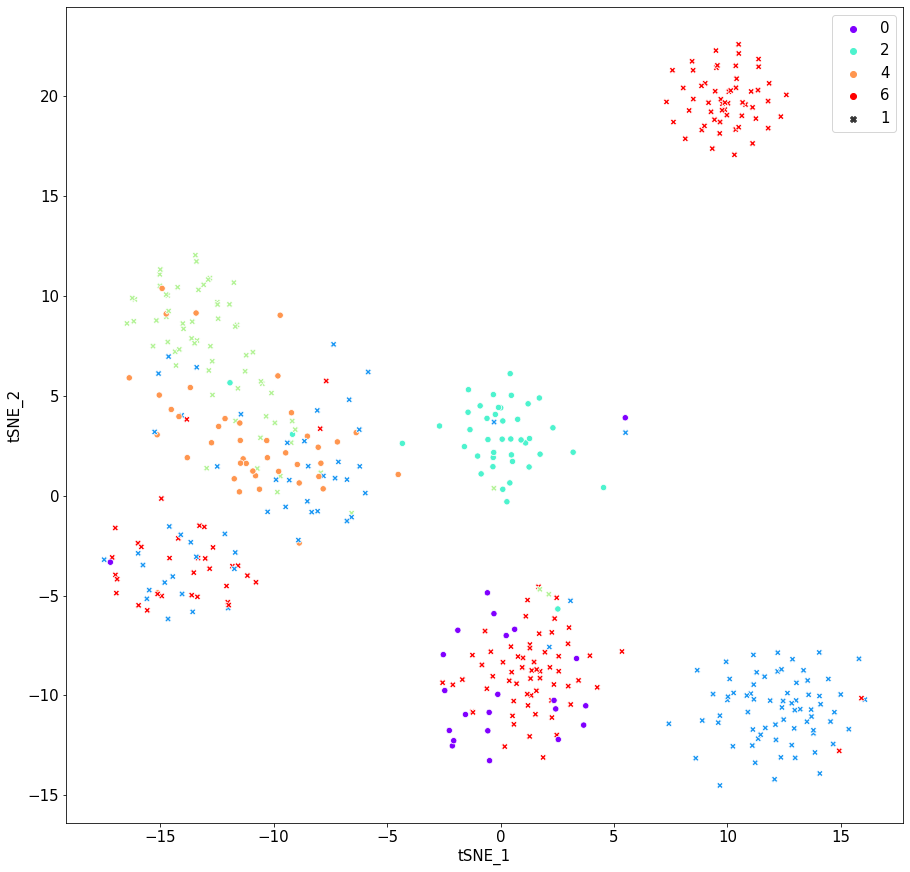

In [55]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

np.unique(plot_value,return_counts=True)

In [56]:
import statsmodels.api as sm
import sys

label=np.argmax(gamma_new.cpu().numpy(),axis=1)
label=list(map(lambda x: np.unique(label,return_counts=True)[0].tolist().index(x),label))

#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null_test=np.concatenate([x_data_intercept,np.eye(max(label)+1)[label]],axis=1)
x_data_null_test=x_data_null_test[:,:-1]

family=sm.families.Poisson(link=sm.families.links.log())

data_list=[]
data_list_=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    if exp_data_row_idx%100==0:
        sys.stdout.write('\r{}'.format(exp_data_row_idx))
    y_data=exp_data[exp_data_row_idx,:]
    
    model=sm.GLM(y_data,x_data_null_test,family=family)
    model_result=model.fit()
    
    model_=sm.GLM(y_data,x_data_null,family=family)
    model_result_=model_.fit()
    
    data_list.append({
        'llf':model_result.llf,
        'deviance':model_result.deviance,
        'pearson_chi2':model_result.pearson_chi2,
        'llnull':model_result.llnull,
        'null_deviance':model_result.null_deviance
    })
    
    data_list_.append({
        'llf':model_result_.llf,
        'deviance':model_result_.deviance,
        'pearson_chi2':model_result_.pearson_chi2,
        'llnull':model_result_.llnull,
        'null_deviance':model_result_.null_deviance
    })    
    
    #ll_list.append([model_result.llf,model_result.deviance,model_result.pearson_chi2])
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

4800

In [57]:
data_full=pd.DataFrame(data_list)
data_null=pd.DataFrame(data_list_)

In [58]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

1

In [59]:
rho_drop.shape

(6, 13)

In [60]:
marker_unique_exp_data_idx=list(map(lambda x: exp_data_row.index(x), rho.columns))
marker_unique_exp_data_idx_bool=np.array(list(map(lambda x: x in marker_unique_exp_data_idx, np.arange(exp_data.shape[0]))))

marker_unique_exp_data_idx_drop=list(map(lambda x: exp_data_row.index(x), rho_drop.columns))
marker_unique_exp_data_idx_bool_drop=np.array(list(map(lambda x: x in marker_unique_exp_data_idx_drop, np.arange(exp_data.shape[0]))))

## deviance of null model

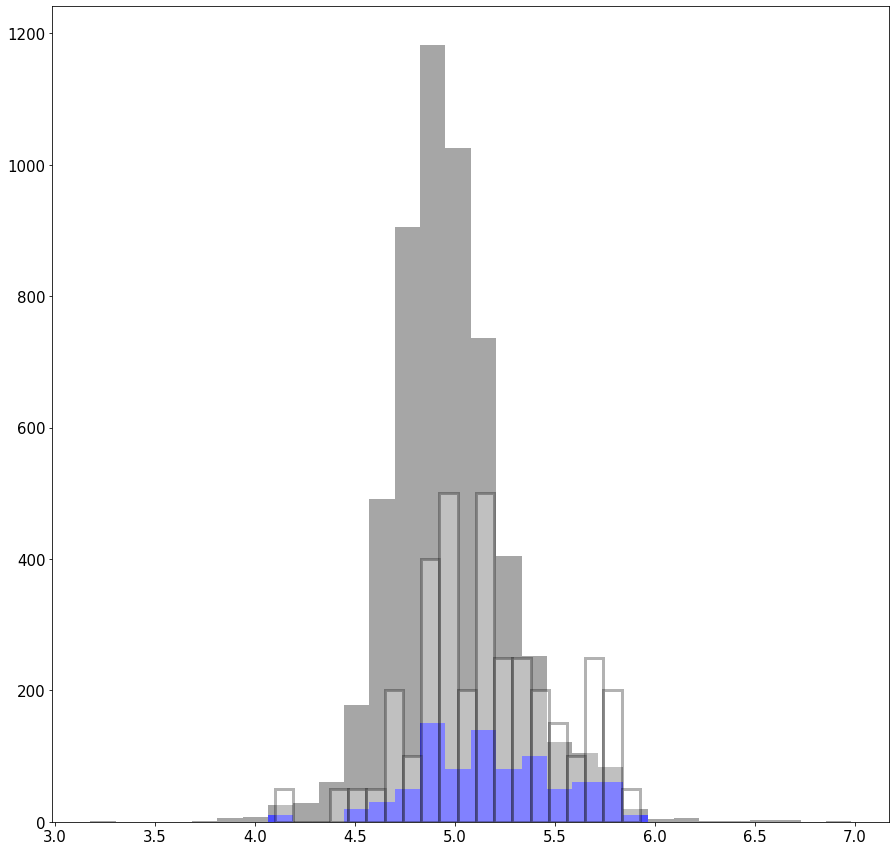

"\ndata_full['null_deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)\ndata_full['null_deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)\n\ndata_full['deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)\ndata_full['deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)\n"

In [61]:
plt.hist(
    x=[
        np.log10(data_full['null_deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['null_deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30,
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7
)
plt.hist(
    x=np.log10(data_full['null_deviance'])[pd.Index(marker_unique_exp_data_idx).difference(pd.Index(marker_unique_exp_data_idx_drop))].repeat(50),
    bins=20,
    alpha=0.3,
    color='white',
    edgecolor='black',
    linewidth=3
)
plt.show()

"""
data_full['null_deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)
data_full['null_deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)

data_full['deviance'][marker_unique_exp_data_idx_bool].hist(alpha=0.5,density=True)
data_full['deviance'][~marker_unique_exp_data_idx_bool].hist(bins=50,alpha=0.5,density=True)
"""

## deviance of full model

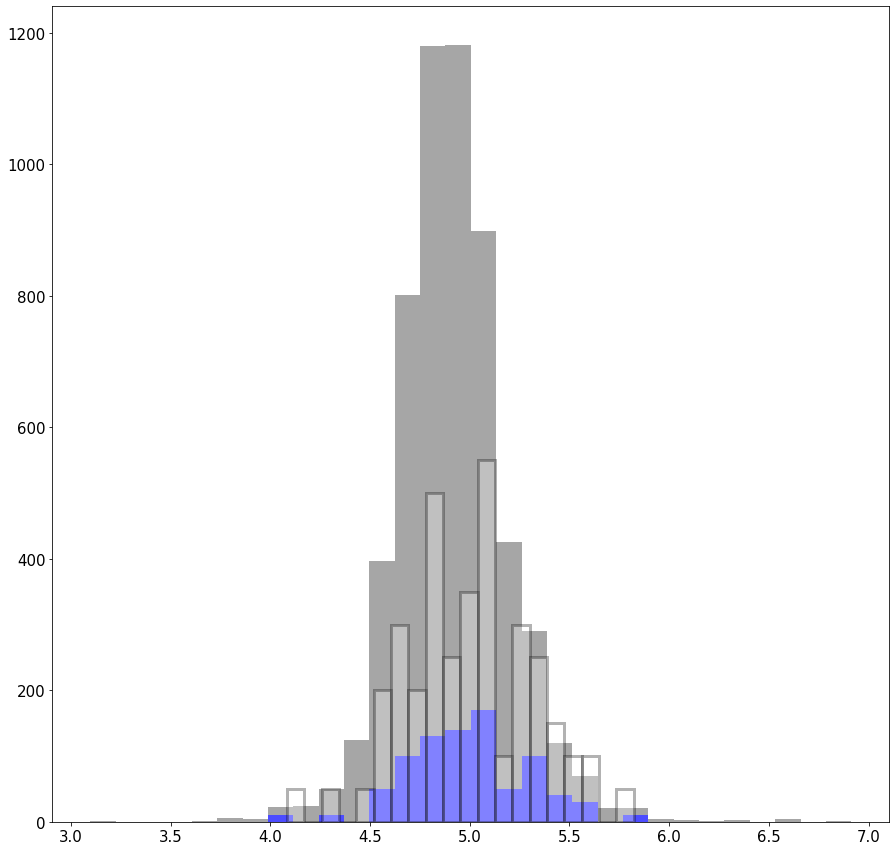

In [62]:
plt.hist(
    x=[
        np.log10(data_full['deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30, 
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7    
    
)
plt.hist(
    np.log10(data_full['deviance'])[pd.Index(marker_unique_exp_data_idx).difference(pd.Index(marker_unique_exp_data_idx_drop))].repeat(50),
    bins=20,
    alpha=0.3,
    color='white',
    edgecolor='black',
    linewidth=3
)
plt.show()

# 3. Case of lost types and markers + 5 redundant clusters

In [63]:
def run_EM_(model,optimizer,LL_diff_tolerance,Q_diff_tolerance):
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data[:-5]=model.delta_log.data.clamp(min=model.delta_log_min)[:-5]
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [64]:
rho_drop.values.shape[1]

13

In [65]:
Y=exp_data[list(map(lambda x: exp_data_row.index(x),rho_drop.columns))].transpose().astype(float)
Y.shape

(446, 13)

In [66]:
device=device_cuda_list[3]#

model=Custom_Model(Y,
                   np.concatenate([rho_drop.values,np.ones((5,rho_drop.values.shape[1]))],axis=0),
                   X_col=X.shape[1],delta_min=2,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [67]:
run_EM_(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance)

Start time: 2020-05-26 13:51:01
tensor(-2941881.9185, device='cuda:2')
tensor(2941883.1182, device='cuda:2')
M: 0, Q: 2941883.1182223414 Q_diff: 0.0
M: 20, Q: 1200837.168975387 Q_diff: 0.5918134335326676
M: 40, Q: 1171191.691299308 Q_diff: 0.024687341832843067
M: 60, Q: 1164322.520948008 Q_diff: 0.005865111921755156
M: 80, Q: 1161848.0399385353 Q_diff: 0.002125253926599195
M: 100, Q: 1160205.2278093444 Q_diff: 0.0014139647120098417
M: 120, Q: 1158591.4704427845 Q_diff: 0.0013909240605707055
M: 140, Q: 1156985.8473570454 Q_diff: 0.0013858405889398291
M: 160, Q: 1155377.391220347 Q_diff: 0.001390212456247963
M: 180, Q: 1153768.5210419418 Q_diff: 0.0013925061980881023
M: 200, Q: 1152162.2612175872 Q_diff: 0.0013921855164709216
M: 220, Q: 1150562.016351515 Q_diff: 0.001388905816426487
M: 240, Q: 1148971.4092658227 Q_diff: 0.001382460973930044
M: 260, Q: 1147394.2044310744 Q_diff: 0.0013727102537356478
M: 280, Q: 1145834.2249288661 Q_diff: 0.0013595846102271369
M: 300, Q: 1144295.2502990887

(tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          5.2992e-306,  0.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          4.8666e-282,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          1.5553e-302,  0.0000e+00]], device='cuda:2'),
 tensor(576302.2437, device='cuda:2', grad_fn=<NegBackward>),
 tensor(-576300.3048, device='cuda:2'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 22,  17,  13,  18,  16,  26, 126,  57,  40,  51,  60]))

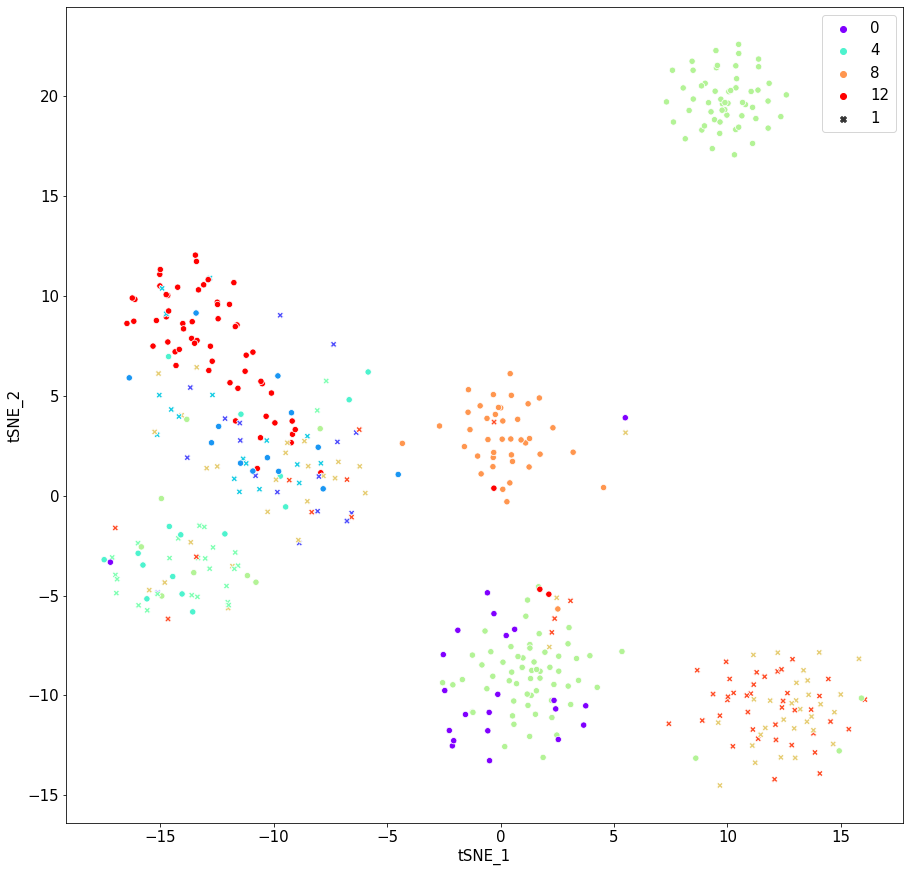

In [68]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

np.unique(plot_value,return_counts=True)

In [69]:
label=np.argmax(gamma_new.cpu().numpy(),axis=1)
label=list(map(lambda x: np.unique(label,return_counts=True)[0].tolist().index(x),label))

x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null_test=np.concatenate([x_data_intercept,np.eye(max(label)+1)[label]],axis=1)

In [70]:
x_data_null_test.shape

(446, 12)

In [71]:
import statsmodels.api as sm
import sys

label=np.argmax(gamma_new.cpu().numpy(),axis=1)
label=list(map(lambda x: np.unique(label,return_counts=True)[0].tolist().index(x),label))

#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null_test=np.concatenate([x_data_intercept,np.eye(max(label)+1)[label]],axis=1)
x_data_null_test=x_data_null_test[:,:-1]

family=sm.families.Poisson(link=sm.families.links.log())

data_list=[]
data_list_=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    if exp_data_row_idx%100==0:
        sys.stdout.write('\r{}'.format(exp_data_row_idx))
    y_data=exp_data[exp_data_row_idx,:]
    
    model=sm.GLM(y_data,x_data_null_test,family=family)
    model_result=model.fit()
    
    model_=sm.GLM(y_data,x_data_null,family=family)
    model_result_=model_.fit()
    
    data_list.append({
        'llf':model_result.llf,
        'deviance':model_result.deviance,
        'pearson_chi2':model_result.pearson_chi2,
        'llnull':model_result.llnull,
        'null_deviance':model_result.null_deviance
    })
    
    data_list_.append({
        'llf':model_result_.llf,
        'deviance':model_result_.deviance,
        'pearson_chi2':model_result_.pearson_chi2,
        'llnull':model_result_.llnull,
        'null_deviance':model_result_.null_deviance
    })    
    
    #ll_list.append([model_result.llf,model_result.deviance,model_result.pearson_chi2])
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

4800

In [72]:
data_full=pd.DataFrame(data_list)
data_null=pd.DataFrame(data_list_)

In [73]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

6

In [74]:
marker_unique_exp_data_idx=list(map(lambda x: exp_data_row.index(x), rho.columns))
marker_unique_exp_data_idx_bool=np.array(list(map(lambda x: x in marker_unique_exp_data_idx, np.arange(exp_data.shape[0]))))

marker_unique_exp_data_idx_drop=list(map(lambda x: exp_data_row.index(x), rho_drop.columns))
marker_unique_exp_data_idx_bool_drop=np.array(list(map(lambda x: x in marker_unique_exp_data_idx_drop, np.arange(exp_data.shape[0]))))

## deviance of null model

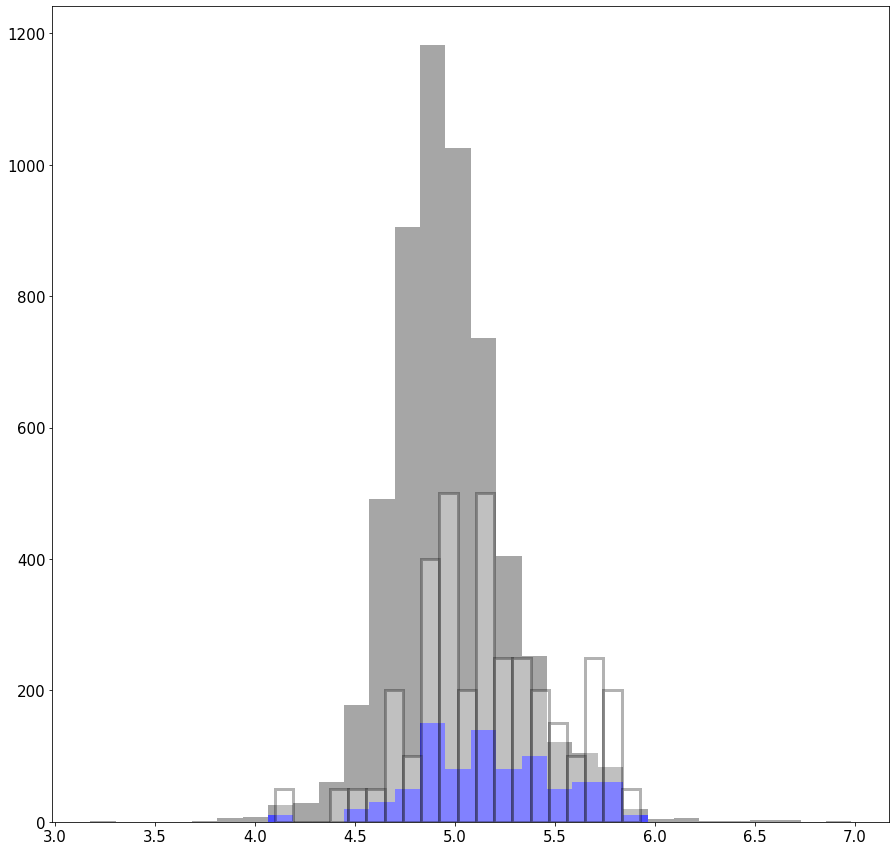

In [75]:
plt.hist(
    x=[
        np.log10(data_full['null_deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['null_deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30,
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7
)
plt.hist(
    x=np.log10(data_full['null_deviance'])[pd.Index(marker_unique_exp_data_idx).difference(pd.Index(marker_unique_exp_data_idx_drop))].repeat(50),
    bins=20,
    alpha=0.3,
    color='white',
    edgecolor='black',
    linewidth=3
)
plt.show()

## deviance of full model

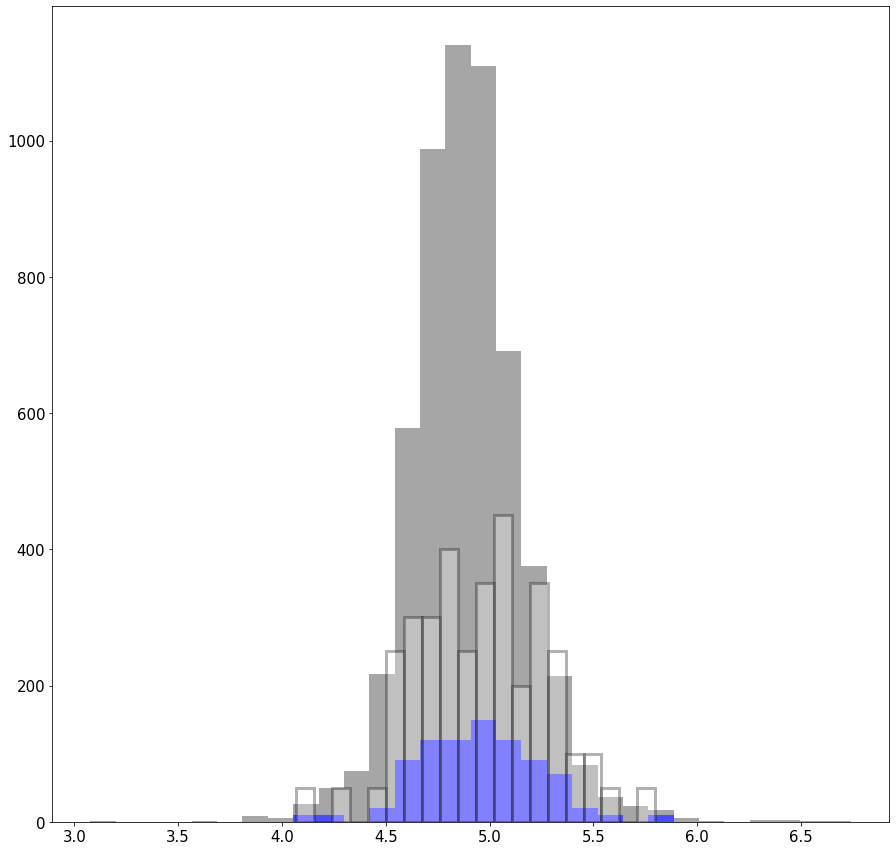

In [76]:
plt.hist(
    x=[
        np.log10(data_full['deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30, 
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7    
    
)
plt.hist(
    np.log10(data_full['deviance'])[pd.Index(marker_unique_exp_data_idx).difference(pd.Index(marker_unique_exp_data_idx_drop))].repeat(50),
    bins=20,
    alpha=0.3,
    color='white',
    edgecolor='black',
    linewidth=3
)
plt.show()

In [77]:
data_full['deviance'].sort_values(ascending=False)

0       5.508826e+06
1       3.380692e+06
2       2.949016e+06
3       2.685364e+06
4       2.666817e+06
            ...     
4524    6.629339e+03
4638    6.478960e+03
4143    6.473952e+03
4633    4.787749e+03
4189    1.191683e+03
Name: deviance, Length: 4898, dtype: float64

# 4. Case of lost types and markers + 5 redundant clusters + recovery

In [78]:
def run_EM_(model,optimizer,LL_diff_tolerance,Q_diff_tolerance):
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data[:-5,:-value]=model.delta_log.data.clamp(min=model.delta_log_min)[:-5,:-value]
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [80]:
LL_all=pd.concat([pd.read_csv('LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,2,3,5,8,10,20,30,40,50]],axis=1)#[pd.read_csv('LL_{}.csv'.format(c),index_col=0,header=None) for c in [1,3,5,8,10,20]
LL_all.columns=[1,2,3,5,8,10,20,30,40,50]

In [171]:
value=60

In [161]:
pd.Series(np.var(exp_data,axis=1))

0       1.308077e+09
1       3.395042e+08
2       3.328137e+08
3       2.791383e+08
4       2.980235e+08
            ...     
4893    1.778631e+04
4894    1.083816e+04
4895    1.039980e+05
4896    3.137651e+03
4897    8.550312e+03
Length: 4898, dtype: float64

In [248]:
value=200

In [249]:
new_markers=pd.DataFrame(1,index=rho_drop.index,columns=np.array(exp_data_row)[(LL_all[1]/LL_all[2])[LL_all.index.difference(marker_unique_exp_data_idx_drop)].sort_values(ascending=False)[:value].index])

In [250]:
len(rho.columns.intersection(new_markers.columns))

33

In [251]:
new_markers=pd.DataFrame(1,index=rho_drop.index,columns=np.array(exp_data_row)[(LL_all[1]/LL_all[3])[LL_all.index.difference(marker_unique_exp_data_idx_drop)].sort_values(ascending=False)[:value].index])

In [252]:
len(rho.columns.intersection(new_markers.columns))

35

In [247]:
#pd.Series(np.var(exp_data,axis=1))[LL_all.index.difference(marker_unique_exp_data_idx_drop)].sort_values(ascending=False)[:value]

In [174]:
new_markers=pd.DataFrame(1,index=rho_drop.index,columns=np.array(exp_data_row)[pd.Series(np.var(exp_data,axis=1))[LL_all.index.difference(marker_unique_exp_data_idx_drop)].sort_values(ascending=False)[:value].index])

In [175]:
len(rho.columns.intersection(new_markers.columns))

0

In [152]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
#pd.DataFrame([(LL_all[1]/LL_all[3]),marker_unique_exp_data_idx_bool,marker_unique_exp_data_idx_bool_drop],index=['log/log','IsMarker','IsMarkerAfterDrop']).T.sort_values('log/log',ascending=False)

In [153]:
rho_drop_recover=pd.concat([rho_drop,new_markers],axis=1)

In [154]:
rho.shape,rho_drop.shape,rho_drop_recover.shape

((8, 84), (6, 13), (6, 14))

In [155]:
new_markers

,ENSG00000198804
MPS,1
DLL1pPXM,1
ESMT,1
Sclrtm,1
D5CntrlDrmmtm,1
D2LtM,1


In [156]:
Y=exp_data[list(map(lambda x: exp_data_row.index(x),rho_drop_recover.columns))].transpose().astype(float)
Y.shape

(446, 14)

In [157]:
device=device_cuda_list[3]#

model=Custom_Model(Y,
                   np.concatenate([rho_drop_recover.values,np.ones((5,rho_drop_recover.values.shape[1]))],axis=0),
                   X_col=X.shape[1],delta_min=2,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [158]:
run_EM_(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance)

Start time: 2020-05-26 15:14:51
tensor(-13240334.5031, device='cuda:2')
tensor(13240334.5031, device='cuda:2')
M: 0, Q: 13240334.503081884 Q_diff: 0.0
M: 20, Q: 5820379.558544102 Q_diff: 0.5604053993356949
M: 40, Q: 5115957.320530377 Q_diff: 0.12102685588256164
M: 60, Q: 4760769.512006185 Q_diff: 0.06942743777373217
M: 80, Q: 4593436.312318694 Q_diff: 0.03514835138846641
M: 100, Q: 4520582.6599646825 Q_diff: 0.015860381509727725
M: 120, Q: 4486959.3169511035 Q_diff: 0.007437833912728788
M: 140, Q: 4469011.693153157 Q_diff: 0.003999952424383034
M: 160, Q: 4457520.866282456 Q_diff: 0.002571223272542795
M: 180, Q: 4449190.963158372 Q_diff: 0.0018687300349153164
M: 200, Q: 4442738.865522573 Q_diff: 0.0014501732313190938
M: 220, Q: 4437574.642885361 Q_diff: 0.0011623961690137435
M: 240, Q: 4433374.9148286395 Q_diff: 0.000946401670889006
M: 260, Q: 4429930.501185453 Q_diff: 0.0007769281212076436
M: 280, Q: 4427087.859021047 Q_diff: 0.0006416900137924832
M: 300, Q: 4424725.923211733 Q_diff: 0

(tensor([[0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]], device='cuda:2'),
 tensor(2315173.1902, device='cuda:2', grad_fn=<NegBackward>),
 tensor(-2315187.7592, device='cuda:2'))

(array([0, 1, 5, 8, 9]), array([101,  76,  22,  81, 166]))

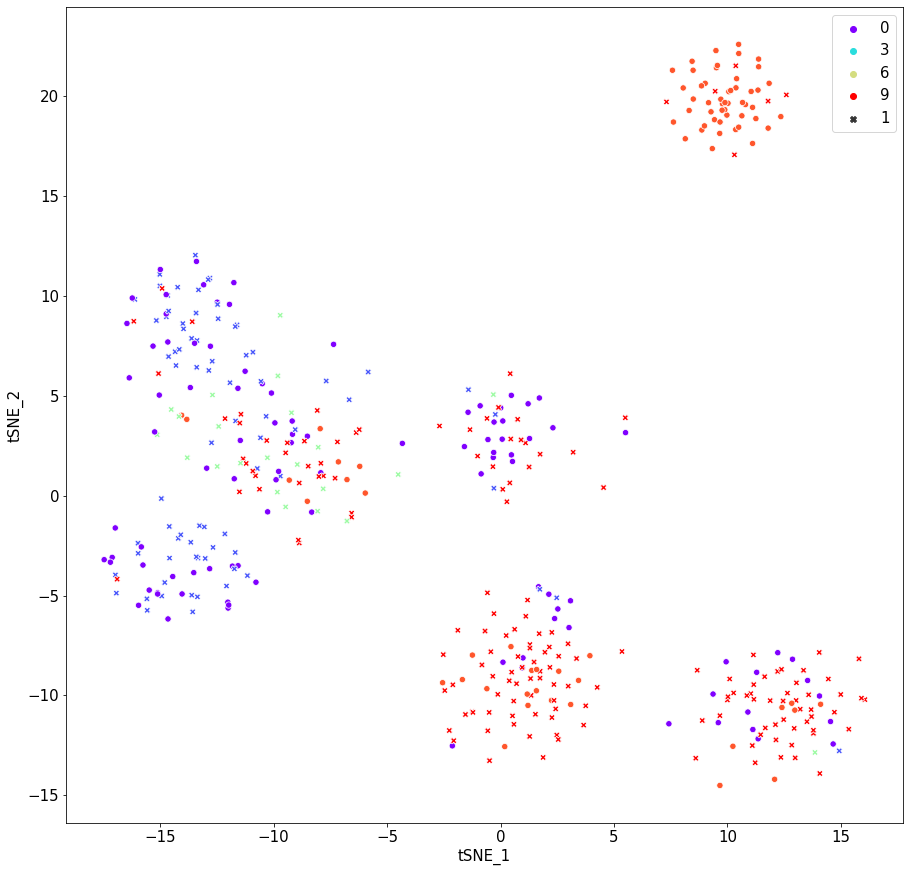

In [159]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

np.unique(plot_value,return_counts=True)

In [225]:
label=np.argmax(gamma_new.cpu().numpy(),axis=1)
label=list(map(lambda x: np.unique(label,return_counts=True)[0].tolist().index(x),label))

x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null_test=np.concatenate([x_data_intercept,np.eye(max(label)+1)[label]],axis=1)

In [206]:
x_data_null_test.shape

(446, 12)

In [119]:
import statsmodels.api as sm
import sys

label=np.argmax(gamma_new.cpu().numpy(),axis=1)
label=list(map(lambda x: np.unique(label,return_counts=True)[0].tolist().index(x),label))

#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null_test=np.concatenate([x_data_intercept,np.eye(max(label)+1)[label]],axis=1)
x_data_null_test=x_data_null_test[:,:-1]

family=sm.families.Poisson(link=sm.families.links.log())

data_list=[]
data_list_=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    if exp_data_row_idx%100==0:
        sys.stdout.write('\r{}'.format(exp_data_row_idx))
    y_data=exp_data[exp_data_row_idx,:]
    
    model=sm.GLM(y_data,x_data_null_test,family=family)
    model_result=model.fit()
    
    model_=sm.GLM(y_data,x_data_null,family=family)
    model_result_=model_.fit()
    
    data_list.append({
        'llf':model_result.llf,
        'deviance':model_result.deviance,
        'pearson_chi2':model_result.pearson_chi2,
        'llnull':model_result.llnull,
        'null_deviance':model_result.null_deviance
    })
    
    data_list_.append({
        'llf':model_result_.llf,
        'deviance':model_result_.deviance,
        'pearson_chi2':model_result_.pearson_chi2,
        'llnull':model_result_.llnull,
        'null_deviance':model_result_.null_deviance
    })    
    
    #ll_list.append([model_result.llf,model_result.deviance,model_result.pearson_chi2])
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

4800

In [120]:
data_full=pd.DataFrame(data_list)
data_null=pd.DataFrame(data_list_)

In [121]:
model_result.null_deviance#,model_result.null

40799.684922023094

In [122]:
#np.sum((y_data-np.exp(model_result.null)))

In [255]:
marker_unique_exp_data_idx=list(map(lambda x: exp_data_row.index(x), rho.columns))
marker_unique_exp_data_idx_bool=np.array(list(map(lambda x: x in marker_unique_exp_data_idx, np.arange(exp_data.shape[0]))))

marker_unique_exp_data_idx_drop=list(map(lambda x: exp_data_row.index(x), rho_drop.columns))
marker_unique_exp_data_idx_bool_drop=np.array(list(map(lambda x: x in marker_unique_exp_data_idx_drop, np.arange(exp_data.shape[0]))))

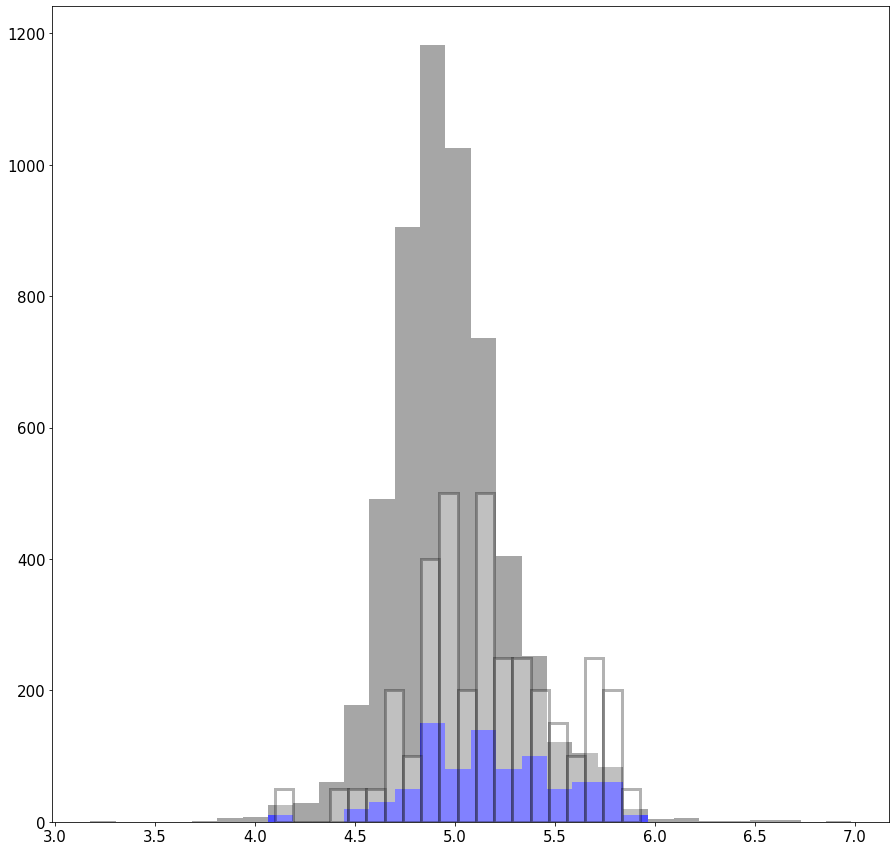

In [124]:
plt.hist(
    x=[
        np.log10(data_full['null_deviance'])[marker_unique_exp_data_idx_bool].repeat(10),# np.sum(~marker_unique_exp_data_idx_bool)/np.sum(marker_unique_exp_data_idx_bool) ),
        np.log10(data_full['null_deviance'])[~marker_unique_exp_data_idx_bool],
    ],
    bins=30,
    histtype='barstacked',
    color=['blue','grey'],
    alpha=0.7
)
plt.hist(
    x=np.log10(data_full['null_deviance'])[pd.Index(marker_unique_exp_data_idx).difference(pd.Index(marker_unique_exp_data_idx_drop))].repeat(50),
    bins=20,
    alpha=0.3,
    color='white',
    edgecolor='black',
    linewidth=3
)
plt.show()